# Data Exploration on Yelp Restaurant Reviews and Zillow House Price Data

In [1]:
import json 
import requests 

# Importing libraries to work with/explore data:
import pandas as pd
import numpy as np
import datetime, time
from sklearn import preprocessing
from functools import reduce

# Importing libraries to create visualizations:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
# import itertools
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

In [2]:
path = "../Resources/neighborhood_tier_final.csv"
df = pd.read_csv(path)
df.head()

,postal_code,State,City,CountyName,2021,total_restaurants,avg_stars,total_reviews,BubbleTea,Coffee&Tea,...,stars_1.0_ratio,ratio_stars_1.0,ratio_stars_1.5,ratio_stars_2.0,ratio_stars_2.5,ratio_stars_3.0,ratio_stars_3.5,ratio_stars_4.0,ratio_stars_4.5,ratio_stars_5.0
0,37013,TN,Nashville,Davidson County,291881,83,3.096386,4257.0,0.0,4.0,...,0.036145,0.036145,0.108434,0.144578,0.108434,0.132530,0.084337,0.192771,0.180723,0.012048
1,37211,TN,Nashville,Davidson County,336572,182,3.491758,12761.0,2.0,12.0,...,0.027473,0.027473,0.060440,0.087912,0.049451,0.142857,0.126374,0.214286,0.219780,0.071429
2,37221,TN,Nashville,Davidson County,396261,69,3.217391,6690.0,0.0,3.0,...,0.014493,0.014493,0.057971,0.115942,0.101449,0.159420,0.231884,0.188406,0.130435,0.000000
3,37209,TN,Nashville,Davidson County,440662,147,3.772109,16663.0,0.0,10.0,...,0.006803,0.006803,0.034014,0.061224,0.034014,0.074830,0.149660,0.292517,0.292517,0.054422
4,37076,TN,Nashville,Davidson County,324646,81,3.228395,4994.0,0.0,4.0,...,0.012346,0.012346,0.098765,0.074074,0.135802,0.172840,0.185185,0.135802,0.111111,0.074074


In [3]:
df.shape

(760, 448)

In [4]:
df.CountyName.value_counts()

Montgomery County       61
Hillsborough County     50
Philadelphia County     46
Pinellas County         45
Marion County           38
Saint Louis County      38
Bucks County            37
Delaware County         35
Pima County             34
Camden County           34
Davidson County         26
Gloucester County       22
Burlington County       21
Chester County          21
Pasco County            19
Orleans Parish          17
New Castle County       17
Washoe County           17
Saint Louis City        17
Saint Clair County      15
Ada County              14
Jefferson Parish        14
Madison County          13
Mercer County           12
Santa Barbara County    10
Hamilton County          7
Salem County             7
Williamson County        6
Saint Bernard Parish     5
Johnson County           5
Hernando County          5
Hendricks County         4
Hancock County           3
Robertson County         3
Jefferson County         3
Cheatham County          3
Hunterdon County         2
M

In [5]:
pd.options.display.max_rows = 999

In [6]:
df.columns.to_list()

['postal_code',
 'State',
 'City',
 'CountyName',
 '2021',
 'total_restaurants',
 'avg_stars',
 'total_reviews',
 'BubbleTea',
 'Coffee&Tea',
 'Bakeries',
 'Burgers',
 'FastFood',
 'Sandwiches',
 'IceCream&FrozenYogurt',
 'Vietnamese',
 'FoodTrucks',
 'American(Traditional)',
 'Diners',
 'Breakfast&Brunch',
 'SushiBars',
 'Japanese',
 'Korean',
 'Steakhouses',
 'AsianFusion',
 'Italian',
 'Pizza',
 'ChickenWings',
 'Brewpubs',
 'Breweries',
 'SportsBars',
 'American(New)',
 'Bars',
 'Salad',
 'BeerBar',
 'Lounges',
 'Wraps',
 'Delis',
 'Pubs',
 'WineBars',
 'Gastropubs',
 'JuiceBars&Smoothies',
 'Seafood',
 'Cajun/Creole',
 'Mexican',
 'French',
 'Moroccan',
 'Mediterranean',
 'Chinese',
 'Live/RawFood',
 'Beer',
 'Wine&Spirits',
 'Barbeque',
 'Thai',
 'Bagels',
 'Southern',
 'Irish',
 'Vegan',
 'CocktailBars',
 'Tapas/SmallPlates',
 'IrishPub',
 'CoffeeRoasteries',
 'Cupcakes',
 'Caribbean',
 'Trinidadian',
 'Cafes',
 'ComfortFood',
 'Donuts',
 'AcaiBowls',
 'Vegetarian',
 'Pakistani'

#### Examiniing categories not in official Yelp restaurant category list

In [7]:
df[df["EasternEuropean"]!=0.0].shape


(1, 448)

In [8]:
df[df["EthnicFood"]!=0.0].shape


(190, 448)

In [9]:
df[df["Israeli"]!=0.0]

,postal_code,State,City,CountyName,2021,total_restaurants,avg_stars,total_reviews,BubbleTea,Coffee&Tea,...,stars_1.0_ratio,ratio_stars_1.0,ratio_stars_1.5,ratio_stars_2.0,ratio_stars_2.5,ratio_stars_3.0,ratio_stars_3.5,ratio_stars_4.0,ratio_stars_4.5,ratio_stars_5.0
100,19106,PA,Philadelphia,Philadelphia County,416813,139,3.762590,38817.0,1.0,19.0,...,0.0,0.0,0.007194,0.028777,0.035971,0.129496,0.208633,0.352518,0.223022,0.014388
247,19426,PA,Upper Providence Township,Montgomery County,448525,62,3.604839,5082.0,0.0,5.0,...,0.0,0.0,0.016129,0.032258,0.112903,0.112903,0.241935,0.306452,0.129032,0.048387


In [10]:
df[df["French"]!=0.0]

,postal_code,State,City,CountyName,2021,total_restaurants,avg_stars,total_reviews,BubbleTea,Coffee&Tea,...,stars_1.0_ratio,ratio_stars_1.0,ratio_stars_1.5,ratio_stars_2.0,ratio_stars_2.5,ratio_stars_3.0,ratio_stars_3.5,ratio_stars_4.0,ratio_stars_4.5,ratio_stars_5.0
3,37209,TN,Nashville,Davidson County,440662,147,3.772109,16663.0,0.0,10.0,...,0.006803,0.006803,0.034014,0.061224,0.034014,0.074830,0.149660,0.292517,0.292517,0.054422
8,37203,TN,Nashville,Davidson County,525141,305,3.677049,73619.0,2.0,26.0,...,0.000000,0.000000,0.045902,0.019672,0.059016,0.118033,0.170492,0.380328,0.167213,0.039344
10,37206,TN,Nashville,Davidson County,469301,106,4.070755,23357.0,1.0,13.0,...,0.000000,0.000000,0.018868,0.009434,0.009434,0.037736,0.150943,0.339623,0.339623,0.094340
13,37215,TN,Nashville,Davidson County,925358,54,3.444444,5769.0,0.0,4.0,...,0.000000,0.000000,0.018519,0.037037,0.111111,0.222222,0.277778,0.166667,0.148148,0.018519
14,37208,TN,Nashville,Davidson County,383989,68,4.000000,13385.0,0.0,4.0,...,0.000000,0.000000,0.014706,0.014706,0.029412,0.044118,0.147059,0.367647,0.308824,0.073529
19,37204,TN,Nashville,Davidson County,761138,80,3.631250,17763.0,0.0,11.0,...,0.000000,0.000000,0.037500,0.062500,0.075000,0.062500,0.212500,0.287500,0.262500,0.000000
25,37201,TN,Nashville,Davidson County,401798,86,3.755814,29028.0,0.0,6.0,...,0.000000,0.000000,0.011628,0.023256,0.046512,0.116279,0.232558,0.325581,0.220930,0.023256
29,85719,AZ,Tucson,Pima County,302372,168,3.461310,25830.0,3.0,13.0,...,0.005952,0.005952,0.017857,0.065476,0.107143,0.142857,0.232143,0.291667,0.125000,0.011905
33,85716,AZ,Tucson,Pima County,272834,79,3.734177,15579.0,0.0,6.0,...,0.000000,0.000000,0.012658,0.050633,0.063291,0.126582,0.164557,0.291139,0.240506,0.050633
35,85745,AZ,Tucson,Pima County,295677,71,3.387324,6941.0,0.0,3.0,...,0.014085,0.014085,0.014085,0.112676,0.126761,0.098592,0.267606,0.197183,0.112676,0.056338


In [11]:
df[df["LocalFlavor"]!=0.0].shape

(169, 448)

In [12]:
df[df["Lounges"]!=0.0].shape

(163, 448)

In [13]:
df[df["PianoBars"]!=0.0].shape

(13, 448)

In [14]:
pd.set_option('display.max_columns', None)
df[df["Pita"]!=0.0].shape


(1, 448)

In [15]:
df[df["SerboCroatian"]!=0.0]

,postal_code,State,City,CountyName,2021,total_restaurants,avg_stars,total_reviews,BubbleTea,Coffee&Tea,Bakeries,Burgers,FastFood,Sandwiches,IceCream&FrozenYogurt,Vietnamese,FoodTrucks,American(Traditional),Diners,Breakfast&Brunch,SushiBars,Japanese,Korean,Steakhouses,AsianFusion,Italian,Pizza,ChickenWings,Brewpubs,Breweries,SportsBars,American(New),Bars,Salad,BeerBar,Lounges,Wraps,Delis,Pubs,WineBars,Gastropubs,JuiceBars&Smoothies,Seafood,Cajun/Creole,Mexican,French,Moroccan,Mediterranean,Chinese,Live/RawFood,Beer,Wine&Spirits,Barbeque,Thai,Bagels,Southern,Irish,Vegan,CocktailBars,Tapas/SmallPlates,IrishPub,CoffeeRoasteries,Cupcakes,Caribbean,Trinidadian,Cafes,ComfortFood,Donuts,AcaiBowls,Vegetarian,Pakistani,Indian,Soup,Halal,StreetVendors,Greek,FoodStands,HotDogs,Gluten-Free,Empanadas,Desserts,WhiskeyBars,LatinAmerican,Honduran,Noodles,Spanish,Cheesesteaks,African,Kebab,Turkish,MiddleEastern,Lebanese,Creperies,Gelato,Poke,Falafel,Pretzels,Wineries,LocalFlavor,Tex-Mex,DiveBars,Peruvian,Tacos,BeerGardens,SoulFood,Ramen,Malaysian,Burmese,Hawaiian,EthnicFood,Do-It-YourselfFood,Sicilian,Filipino,ThemedCafes,Fish&Chips,Sardinian,Laotian,Teppanyaki,Szechuan,ShavedIce,Persian/Iranian,HongKongStyleCafe,Taiwanese,PanAsian,NewMexicanCuisine,Oriental,Dominican,InternetCafes,Cuban,PuertoRican,Portuguese,DimSum,TapasBars,Cantonese,Arabic,CandyStores,Buffets,Brasseries,Distilleries,Ethiopian,Salvadoran,Karaoke,Mongolian,British,German,Syrian,Armenian,Waffles,ModernEuropean,Colombian,Haitian,Czech,Pop-UpRestaurants,TikiBars,Polish,Hainan,TeaRooms,Russian,Cafeteria,Afghan,Somali,Argentine,Brazilian,PianoBars,Senegalese,Tuscan,Smokehouse,Cambodian,Patisserie/CakeShop,Venezuelan,Shanghainese,Indonesian,GayBars,Kombucha,Calabrian,Australian,Iberian,JapaneseCurry,Izakaya,Nicaraguan,HotPot,Kosher,Pancakes,Egyptian,SriLankan,Uzbek,Scandinavian,Himalayan/Nepalese,ChampagneBars,Delicatessen,Israeli,ShavedSnow,Macarons,Georgian,Belgian,Fuzhou,Basque,Ukrainian,Fondue,Singaporean,SouthAfrican,Bangladeshi,Hungarian,Bistros,Scottish,Guamanian,Tonkatsu,Donburi,Pita,Austrian,EasternEuropean,Cucinacampana,ConveyorBeltSushi,Poutineries,Coffeeshops,SerboCroatian,BubbleTea_stars,Coffee&Tea_stars,Bakeries_stars,Burgers_stars,FastFood_stars,Sandwiches_stars,IceCream&FrozenYogurt_stars,Vietnamese_stars,FoodTrucks_stars,American(Traditional)_stars,Diners_stars,Breakfast&Brunch_stars,SushiBars_stars,Japanese_stars,Korean_stars,Steakhouses_stars,AsianFusion_stars,Italian_stars,Pizza_stars,ChickenWings_stars,Brewpubs_stars,Breweries_stars,SportsBars_stars,American(New)_stars,Bars_stars,Salad_stars,BeerBar_stars,Lounges_stars,Wraps_stars,Delis_stars,Pubs_stars,WineBars_stars,Gastropubs_stars,JuiceBars&Smoothies_stars,Seafood_stars,Cajun/Creole_stars,Mexican_stars,French_stars,Moroccan_stars,Mediterranean_stars,Chinese_stars,Live/RawFood_stars,Beer_stars,Wine&Spirits_stars,Barbeque_stars,Thai_stars,Bagels_stars,Southern_stars,Irish_stars,Vegan_stars,CocktailBars_stars,Tapas/SmallPlates_stars,IrishPub_stars,CoffeeRoasteries_stars,Cupcakes_stars,Caribbean_stars,Trinidadian_stars,Cafes_stars,ComfortFood_stars,Donuts_stars,AcaiBowls_stars,Vegetarian_stars,Pakistani_stars,Indian_stars,Soup_stars,Halal_stars,StreetVendors_stars,Greek_stars,FoodStands_stars,HotDogs_stars,Gluten-Free_stars,Empanadas_stars,Desserts_stars,WhiskeyBars_stars,LatinAmerican_stars,Honduran_stars,Noodles_stars,Spanish_stars,Cheesesteaks_stars,African_stars,Kebab_stars,Turkish_stars,MiddleEastern_stars,Lebanese_stars,Creperies_stars,Gelato_stars,Poke_stars,Falafel_stars,Pretzels_stars,Wineries_stars,LocalFlavor_stars,Tex-Mex_stars,DiveBars_stars,Peruvian_stars,Tacos_stars,BeerGardens_stars,SoulFood_stars,Ramen_stars,Malaysian_stars,Burmese_stars,Hawaiian_stars,EthnicFood_stars,Do-It-YourselfFood_stars,Sicilian_stars,Filipino_stars,ThemedCafes_stars,Fish&Chips_stars,Sardinian_stars,Laotian_stars,Teppanyaki_stars,Szechuan_stars,ShavedIce_stars,Persian/Iranian_stars,HongKongStyleCafe_stars,Taiwanese_stars

In [16]:
df[df["StreetVendors"]!=0.0].shape

(102, 448)

#### Total number  per categories

In [17]:
df_cat = df[df.columns[8:216]]
df_cat_count = df_cat.sum().sort_values()
df_cat_count

Coffeeshops                 0.0
SerboCroatian               1.0
SriLankan                   1.0
Hainan                      1.0
Fuzhou                      1.0
Scottish                    1.0
Guamanian                   1.0
Tonkatsu                    1.0
Calabrian                   1.0
Pita                        1.0
Austrian                    1.0
Poutineries                 1.0
EasternEuropean             1.0
ConveyorBeltSushi           1.0
Cucinacampana               1.0
Donburi                     1.0
Senegalese                  2.0
SouthAfrican                2.0
Somali                      2.0
Oriental                    2.0
Israeli                     2.0
HongKongStyleCafe           3.0
Czech                       4.0
Georgian                    4.0
Nicaraguan                  4.0
Singaporean                 4.0
ShavedSnow                  4.0
Sardinian                   4.0
Belgian                     5.0
Ukrainian                   5.0
Hungarian                   5.0
Tuscan  

In [18]:
tier_df = df["Neighborhood Tiers"]
df_tiers_cat = pd.merge(tier_df, df_cat, left_index=True, right_index=True)
print(df_tiers_cat.shape)
df_tiers_cat.head()

(760, 209)


,Neighborhood Tiers,BubbleTea,Coffee&Tea,Bakeries,Burgers,FastFood,Sandwiches,IceCream&FrozenYogurt,Vietnamese,FoodTrucks,American(Traditional),Diners,Breakfast&Brunch,SushiBars,Japanese,Korean,Steakhouses,AsianFusion,Italian,Pizza,ChickenWings,Brewpubs,Breweries,SportsBars,American(New),Bars,Salad,BeerBar,Lounges,Wraps,Delis,Pubs,WineBars,Gastropubs,JuiceBars&Smoothies,Seafood,Cajun/Creole,Mexican,French,Moroccan,Mediterranean,Chinese,Live/RawFood,Beer,Wine&Spirits,Barbeque,Thai,Bagels,Southern,Irish,Vegan,CocktailBars,Tapas/SmallPlates,IrishPub,CoffeeRoasteries,Cupcakes,Caribbean,Trinidadian,Cafes,ComfortFood,Donuts,AcaiBowls,Vegetarian,Pakistani,Indian,Soup,Halal,StreetVendors,Greek,FoodStands,HotDogs,Gluten-Free,Empanadas,Desserts,WhiskeyBars,LatinAmerican,Honduran,Noodles,Spanish,Cheesesteaks,African,Kebab,Turkish,MiddleEastern,Lebanese,Creperies,Gelato,Poke,Falafel,Pretzels,Wineries,LocalFlavor,Tex-Mex,DiveBars,Peruvian,Tacos,BeerGardens,SoulFood,Ramen,Malaysian,Burmese,Hawaiian,EthnicFood,Do-It-YourselfFood,Sicilian,Filipino,ThemedCafes,Fish&Chips,Sardinian,Laotian,Teppanyaki,Szechuan,ShavedIce,Persian/Iranian,HongKongStyleCafe,Taiwanese,PanAsian,NewMexicanCuisine,Oriental,Dominican,InternetCafes,Cuban,PuertoRican,Portuguese,DimSum,TapasBars,Cantonese,Arabic,CandyStores,Buffets,Brasseries,Distilleries,Ethiopian,Salvadoran,Karaoke,Mongolian,British,German,Syrian,Armenian,Waffles,ModernEuropean,Colombian,Haitian,Czech,Pop-UpRestaurants,TikiBars,Polish,Hainan,TeaRooms,Russian,Cafeteria,Afghan,Somali,Argentine,Brazilian,PianoBars,Senegalese,Tuscan,Smokehouse,Cambodian,Patisserie/CakeShop,Venezuelan,Shanghainese,Indonesian,GayBars,Kombucha,Calabrian,Australian,Iberian,JapaneseCurry,Izakaya,Nicaraguan,HotPot,Kosher,Pancakes,Egyptian,SriLankan,Uzbek,Scandinavian,Himalayan/Nepalese,ChampagneBars,Delicatessen,Israeli,ShavedSnow,Macarons,Georgian,Belgian,Fuzhou,Basque,Ukrainian,Fondue,Singaporean,SouthAfrican,Bangladeshi,Hungarian,Bistros,Scottish,Guamanian,Tonkatsu,Donburi,Pita,Austrian,EasternEuropean,Cucinacampana,ConveyorBeltSushi,Poutineries,Coffeeshops,SerboCroatian
0,3,0.0,4.0,1.0,14.0,22.0,13.0,3.0,0.0,3.0,15.0,3.0,11.0,2.0,1.0,1.0,2.0,2.0,6.0,13.0,18.0,0.0,0.0,4.0,6.0,10.0,5.0,3.0,0.0,1.0,5.0,0.0,2.0,0.0,1.0,7.0,1.0,11.0,0.0,0.0,2.0,4.0,0.0,1.0,1.0,6.0,2.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2.0,12.0,5.0,23.0,37.0,26.0,4.0,3.0,15.0,16.0,3.0,13.0,7.0,5.0,5.0,5.0,6.0,12.0,22.0,17.0,0.0,0.0,3.0,9.0,12.0,8.0,2.0,1.0,0.0,4.0,1.0,0.0,0.0,3.0,9.0,2.0,40.0,0.0,0.0,8.0,9.0,0.0,1.0,1.0,5.0,8.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,6.0,0.0,0.0,0.0,3.0,0.0,3.0,4.0,2.0,4.0,5.0,5.0,4.0,1.0,1.0,7.0,0.0,18.0,1.0,3.0,0.0,0.0,2.0,1.0,3.0,10.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,6.0,1.0,1.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,1.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,3.0,3.0,14.0,20.0,13.0,4.0,0.0,3.0,9.0,1.0,10.0,4.0,1.0,0.0,0.0,2.0,5.0,12.0,5.0,0.0,1.0,5.0,5.0,11.0,4.0,1.0,0.0,0.0,4.0,2.0,1.0,1.0,1.0,4.0,1.0,8.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,

In [19]:
df_bubble = df_tiers_cat[["Neighborhood Tiers", "BubbleTea"]]
df_bubble1 = df_bubble.groupby(["Neighborhood Tiers"]).sum()["BubbleTea"]
df_bubble1

Neighborhood Tiers
1    59.0
2    88.0
3    49.0
Name: BubbleTea, dtype: float64

# Trend Analysis with Scatterplots

#### Total Restaurants vs Neighborhood Tiers

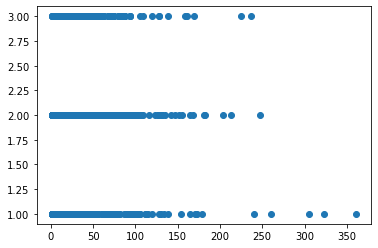

In [20]:
plt.figure(1)
plt.plot(df.total_restaurants,df["Neighborhood Tiers"],'o')


#### Total Reviews vs Neighborhood Tiers

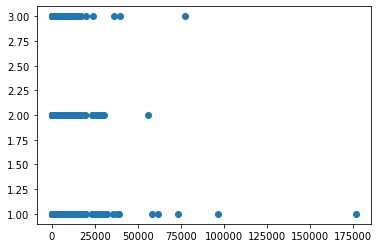

In [21]:
plt.plot(df["total_reviews"], df["Neighborhood Tiers"],'o')
plt.show()

#### Coffee categories vs Neighborhood Tiers

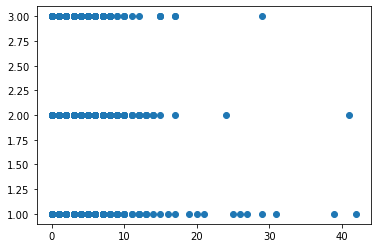

In [22]:
y = df[["Coffee&Tea","CoffeeRoasteries","Coffeeshops"]].sum(axis=1)

plt.plot(y, df["Neighborhood Tiers"],'o')
plt.show()

#### Beer categories vs Neighborhood Tiers

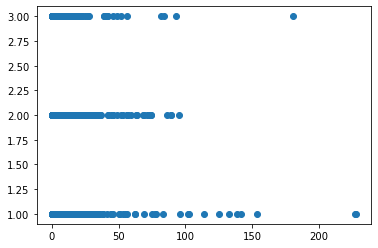

In [23]:
y = df[[ 'Bars',
 'Beer',
 'BeerBar',
 'BeerGardens',
 'Pubs',
 'WhiskeyBars',
 'Wine&Spirits','ChampagneBars','CocktailBars','DiveBars','Karaoke','PianoBars',
 'SportsBars', 'TikiBars', 'WineBars', 'Wineries']].sum(axis=1)

plt.plot(y, df["Neighborhood Tiers"],'o')
plt.show()

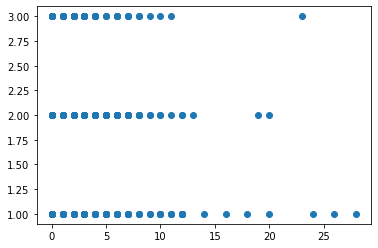

In [24]:
y = df[[ 'Cafes', 'ThemedCafes',]].sum(axis=1)

plt.plot(y, df["Neighborhood Tiers"],'o')
plt.show()

#### African categories vs Neighborhood Tiers

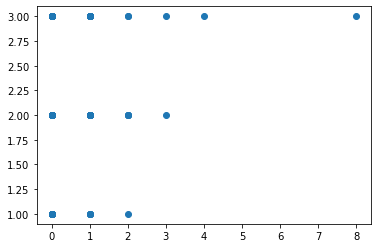

In [25]:
y = df[[ 'African','Senegalese','SouthAfrican',]].sum(axis=1)
plt.plot(y, df["Neighborhood Tiers"],'o')
plt.show()

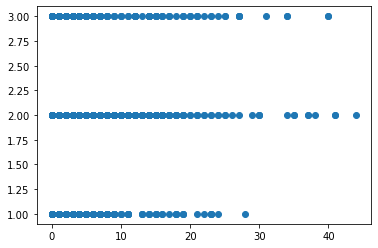

In [26]:
y = df[["FastFood"]].sum(axis=1)
plt.plot(y, df["Neighborhood Tiers"],'o')
plt.show()

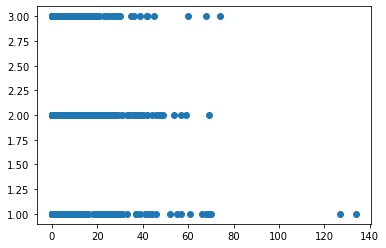

In [27]:
y = df[['American(New)','American(Traditional)']].sum(axis=1)
plt.plot(y, df["Neighborhood Tiers"],'o')
plt.show()

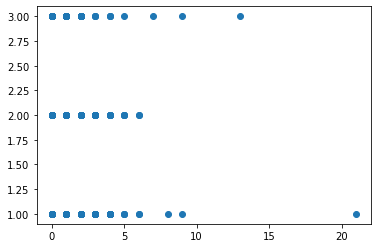

In [28]:
y = df[['AcaiBowls','Bistros','Brasseries','Creperies',
        'Cupcakes','HotPot','BubbleTea']].sum(axis=1)
plt.plot(y, df["Neighborhood Tiers"],'o')
plt.show()

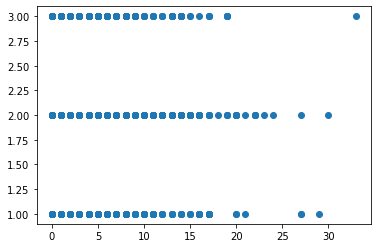

In [29]:
y = df[["Pizza"]].sum(axis=1)
plt.plot(y, df["Neighborhood Tiers"],'o')
plt.show()

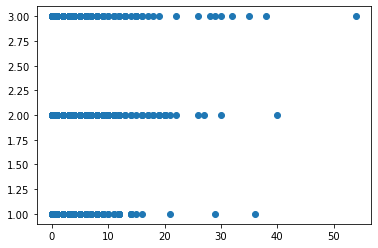

In [30]:
y = df[["Mexican"]].sum(axis=1)
plt.plot(y, df["Neighborhood Tiers"],'o')
plt.show()

#### French restaurant stars per Neighborhood Tiers

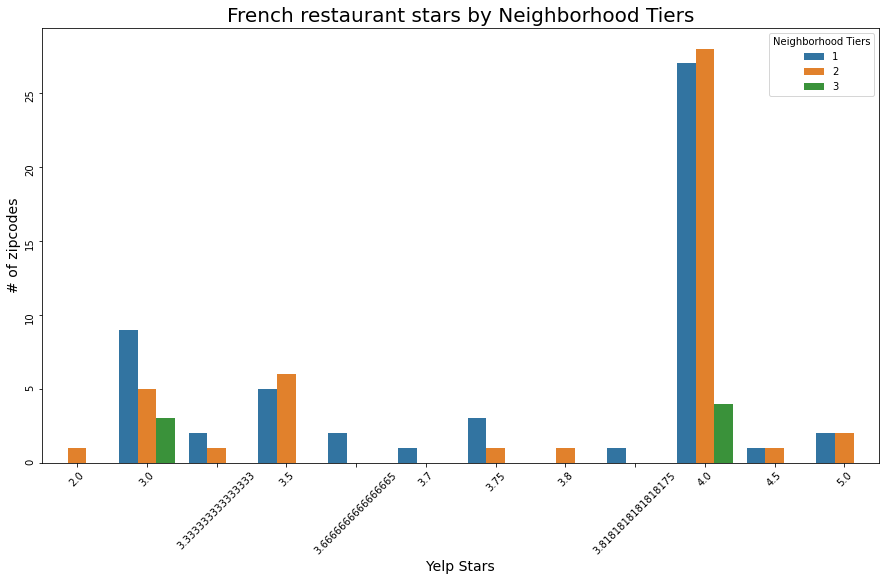

In [31]:
df_f = df[df["French_stars"]!=0.0]
# Create a bar chart comparing the # restaurant stars per neighborhood tier :
plt.figure(figsize=(15,8))
sns.countplot(data=df_f, x='French_stars', hue='Neighborhood Tiers')

# Add chart title and labels
plt.title('French restaurant stars by Neighborhood Tiers', fontsize=20)
plt.xlabel('Yelp Stars', fontsize=14)
plt.ylabel('# of zipcodes', fontsize=14);
plt.xticks(rotation=45);
plt.yticks(rotation=90);

#### Tiers By State

In [32]:
df1 = df.groupby(["CountyName"]).count()["Neighborhood Tiers"]

In [33]:
df_state_tiers = df.loc[df['Neighborhood Tiers'].isin([1,2,3])].copy()

# List in descending order the number of neighborhood tiers in each state:
print('# Of Restaurants Per State:','\n',
      df_state_tiers['Neighborhood Tiers'].groupby(df_state_tiers['State']).count().sort_values(ascending=False))

# Of Restaurants Per State: 
 State
PA    200
FL    122
NJ    102
MO     61
IN     60
TN     48
LA     39
AZ     35
IL     31
NV     18
DE     17
ID     14
CA     12
NC      1
Name: Neighborhood Tiers, dtype: int64


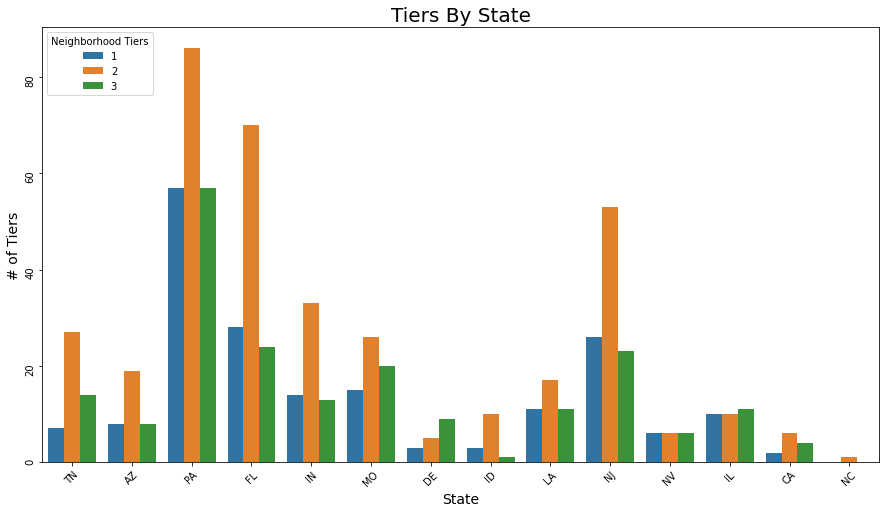

In [34]:
# Create a bar chart comparing the # of each neighborhood tier in each state:
plt.figure(figsize=(15,8))
sns.countplot(data=df_state_tiers, x='State',hue='Neighborhood Tiers')

# Add chart title and labels
plt.title('Tiers By State', fontsize=20)
plt.xlabel('State', fontsize=14)
plt.ylabel('# of Tiers', fontsize=14);
plt.xticks(rotation=45);
plt.yticks(rotation=90);

### Neighborhood Tiers by # of Reviews and Yelp Rating

In [51]:
#read in the expanded_restaurants.csv
df_tiers = pd.read_csv("../Resources/expanded_restaurants.csv")
df_tiers_extract = df_tiers[["postal_code", "stars", "review_count"]]
df_tiers.shape


(33250, 216)

In [39]:
#extract postal code and neighborhood tiers 
df_tier = df[["postal_code", "Neighborhood Tiers"]]
#merge df_tier and df_tiers
#merge dataframes
frames = [df_tier, df_tiers_extract]
star_vs_review_df = reduce(lambda left,right: pd.merge(left,right,on='postal_code'), frames)
star_vs_review_df = star_vs_review_df.drop(columns="postal_code", axis=1)
print(star_vs_review_df.shape)
star_vs_review_df.head()

(33026, 3)


,Neighborhood Tiers,stars,review_count
0,3,3.5,129
1,3,4.5,16
2,3,3.5,23
3,3,2.0,19
4,3,4.0,78


In [40]:
# Print total number of reviews for each inspection grade:
print('# of Restaurants Per Yelp Rating:','\n',
      star_vs_review_df['review_count'].groupby(df_tiers['stars']).count())


# of Restaurants Per Yelp Rating: 
 stars
1.0     176
1.5    1154
2.0    2071
2.5    2945
3.0    4296
3.5    6882
4.0    8626
4.5    5769
5.0    1107
Name: review_count, dtype: int64


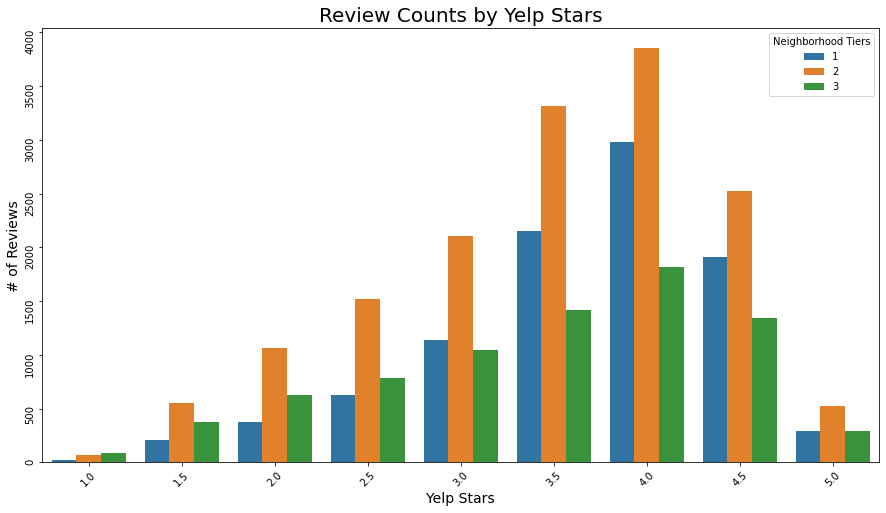

In [41]:
# Create a bar chart comparing the # of reviews :
plt.figure(figsize=(15,8))
sns.countplot(data=star_vs_review_df, x='stars', hue='Neighborhood Tiers')

# Add chart title and labels
plt.title('Review Counts by Yelp Stars', fontsize=20)
plt.xlabel('Yelp Stars', fontsize=14)
plt.ylabel('# of Reviews', fontsize=14);
plt.xticks(rotation=45);
plt.yticks(rotation=90);

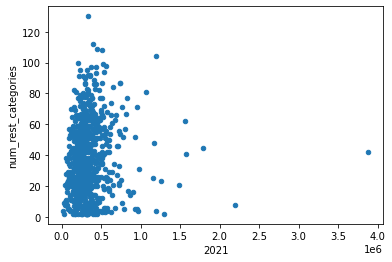

In [43]:
lines = df.plot.scatter(x='2021', y='num_rest_categories')
